###***Reading Data set & Pre-processing***

In [1]:
import pandas as pd

In [10]:
df=pd.read_table("sslc1.txt",sep=";",header=None,na_values=['AA'],index_col=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185667 entries, 10001 to 199999
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       185667 non-null  object 
 1   2       185667 non-null  object 
 2   3       185642 non-null  float64
 3   4       185532 non-null  float64
 4   5       185624 non-null  float64
 5   6       185615 non-null  float64
 6   7       185615 non-null  float64
 7   8       185666 non-null  float64
 8   9       159072 non-null  object 
 9   10      113 non-null     object 
 10  11      0 non-null       float64
dtypes: float64(7), object(4)
memory usage: 17.0+ MB


In [12]:
df.head()

,0,2,3,4,5,6,7,8,9,10,11
1,,,,,,,,,,,
10001,A,ABINESH T N,53.0,36.0,28.0,16.0,44.0,177.0,NaN,NaN,NaN
10002,A,ANAND R,58.0,37.0,42.0,35.0,40.0,212.0,P,NaN,NaN
10003,A,ANISH M,72.0,56.0,71.0,55.0,70.0,324.0,P,NaN,NaN
10004,A,ANITHRAJ S,87.0,64.0,83.0,58.0,65.0,357.0,P,NaN,NaN
10005,A,ARIDHAS N,59.0,45.0,50.0,35.0,48.0,237.0,P,NaN,NaN


In [13]:
df.columns=["region","name","fl","sl","math","sci","ss","total","result","withheld","extra"]

In [14]:
df.columns

Index(['region', 'name', 'fl', 'sl', 'math', 'sci', 'ss', 'total', 'result',
       'withheld', 'extra'],
      dtype='object')

In [15]:
df.drop(df.columns[[9,10]],axis=1,inplace=True)

In [16]:
df.columns

Index(['region', 'name', 'fl', 'sl', 'math', 'sci', 'ss', 'total', 'result'], dtype='object')

In [17]:
df["result"].value_counts()

P    159072
Name: result, dtype: int64

In [18]:
df["result"]=df["result"].fillna("F")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185667 entries, 10001 to 199999
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   region  185667 non-null  object 
 1   name    185667 non-null  object 
 2   fl      185642 non-null  float64
 3   sl      185532 non-null  float64
 4   math    185624 non-null  float64
 5   sci     185615 non-null  float64
 6   ss      185615 non-null  float64
 7   total   185666 non-null  float64
 8   result  185667 non-null  object 
dtypes: float64(6), object(3)
memory usage: 14.2+ MB


In [20]:
df['sl'].head()

1
10001    36.0
10002    37.0
10003    56.0
10004    64.0
10005    45.0
Name: sl, dtype: float64

In [21]:
df.head()

,region,name,fl,sl,math,sci,ss,total,result
1,,,,,,,,,
10001,A,ABINESH T N,53.0,36.0,28.0,16.0,44.0,177.0,F
10002,A,ANAND R,58.0,37.0,42.0,35.0,40.0,212.0,P
10003,A,ANISH M,72.0,56.0,71.0,55.0,70.0,324.0,P
10004,A,ANITHRAJ S,87.0,64.0,83.0,58.0,65.0,357.0,P
10005,A,ARIDHAS N,59.0,45.0,50.0,35.0,48.0,237.0,P





###**Visualization Using Pandas plot()** 
Makes plots of data frame using matplotlib/pylab










***Line plot - Default Plot - Used to observe the trend in the data***

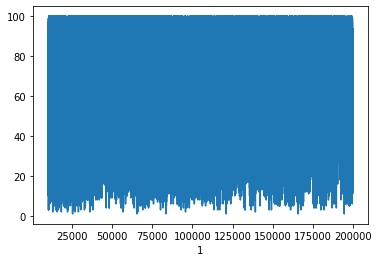

In [25]:
df['math'].plot()

In [26]:
#Sampling the data
df1=df.sample(100,random_state=1)

***Scatter Plot - Used to observe the  relationship between two quantities***

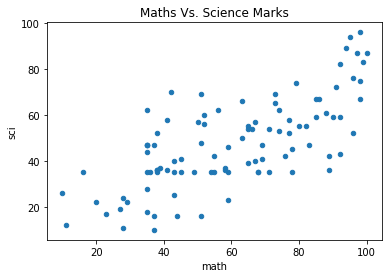

In [38]:
#Visually compare the marks in maths and science subjects
df1.plot.scatter(x="math",y="sci",alpha=0.8)
#df1.plot('math','sci',kind='scatter',title='Maths Vs. Science Marks')      #Another way to get the plot

*Inference: There exists a linear relationship between maths mark and science mark.* 

***Histogram - Used to plot the frequency distribution of a variable***

Text(0.5, 0, 'Maths')

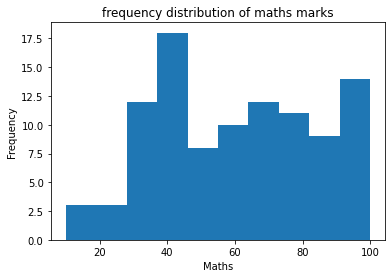

In [56]:
#Frequency distribution of Maths mark using histogram
df1['math'].plot.hist()
#ax=df1['math'].plot.hist(title='frequency distribution of maths marks')    #setting title for the plot
#ax.set_xlabel('Maths')                                                     #setting label for x-axis
#df1.plot(y='math',kind='hist', title='frequency distribution of maths marks')  #Another way to get the plot


*. Inferences: Most of the students have scored between 40 and 45. Around 12 students have scored between 60 and 80*

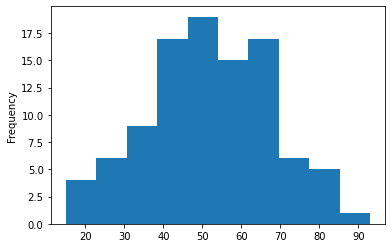

In [ ]:
#Frequency distribution of Second language mark using histogram
df1['sl'].plot.hist()

Inferences: Most of the students have scored between 50 and 55. Between 60 and 80, approximately 15 students are there, slightly better than maths marks

***Density plot - shows the distribution of a variable***

Text(0.5, 0, 'Second language')

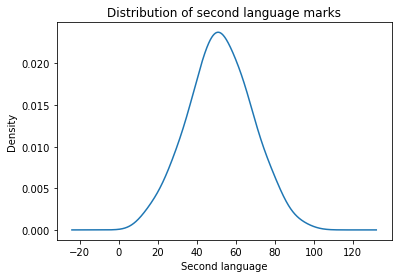

In [57]:
#Density of Maths mark using density/kde plot
ax=df1['sl'].plot.kde(title='Distribution of second language marks')
ax.set_xlabel('Second language')
#df1['sl'].plot.density()
#df1.plot(y='sl',kind='kde')

*Inferences: The second language mark is normally distributed with mean =50 and std.dev =10 approx.*

***Bar plot - Used to compare categorical variables***

In [63]:
reg=df1['region'].value_counts()
reg

A    26
B    21
C    17
E    13
D    13
F    10
Name: region, dtype: int64

Text(0, 0.5, 'Count')

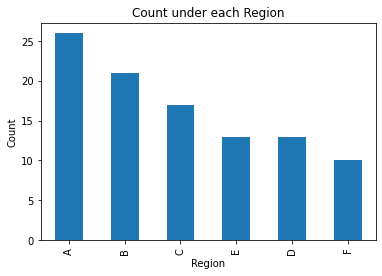

In [66]:
#comparing the values using bar plot
ax=reg.plot.bar(title='Count under each Region')
ax.set_xlabel('Region')
ax.set_ylabel('Count')

*Inferences: Region A has more students and Region F has less students out of 100 students*

***Box plot - Used to project the five summary statistics (Min, Q1, Q2, Q3, Max) and outlier if any***

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'marks')

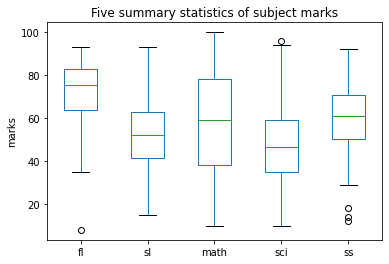

In [68]:
#summary statistics of marks using box plot
ax=df1[['fl','sl','math','sci','ss']].plot.box(title='Five summary statistics of subject marks')
ax.set_ylabel('marks')

Inferences: Median of first language mark is higher than other subjects and lesser in science subject. There are a few outliers in first language, science and social science marks

***Pie plot - Used to depict the part of a whole***

In [72]:
#proportion of pass and fail values
res=df1['result'].value_counts()
res
#df1['Pass'].value_counts().plot.pie()

P    82
F    18
Name: result, dtype: int64

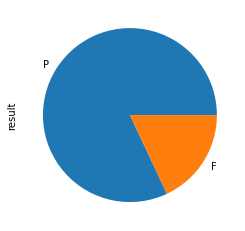

In [73]:
res.plot.pie()

Inferences: Most of the entries in the marks belong to pass category

In [76]:
reg_res=df1.groupby('region')['result'].count()
reg_res

region
A    26
B    21
C    17
D    13
E    13
F    10
Name: result, dtype: int64

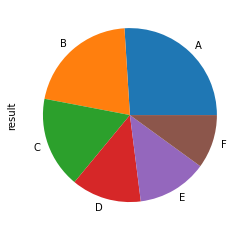

In [77]:
#df1['Pass'].value_counts().plot.pie()
reg_res.plot.pie()

*Inferences: Region A, B entries are more than other regions*

In [85]:
df1_pass=df1[df1['result']=='P']
reg_pres=df1_pass.groupby('region')['result'].count()
reg_pres

region
A    22
B    18
C    15
D     9
E    10
F     8
Name: result, dtype: int64

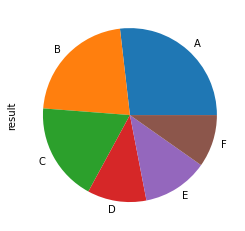

In [86]:
reg_pres.plot.pie()

*Inferences: Same as that of region result as most of the entries are pass in each region *

### **Visualization Using Matplotlib**

***It has a collection of functions which make matplotlib works like MATLAB***

In [88]:
import matplotlib.pyplot as plt      

***Line plot - Default plot***

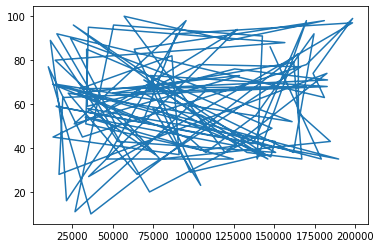

In [90]:
#Default - line plot
#plotting single variable
plt.plot(df1.math)                     #plot math marks using default line and colour
#plt.plot('math',data=df1)


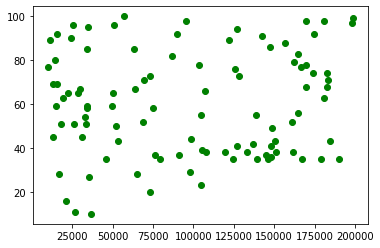

In [132]:
#changing the style of the plot
plt.plot(df1.math,'go')   #'go' - g-green colour and o - circle marker

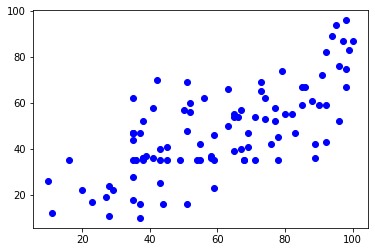

In [96]:
#plotting two variables
plt.plot(df1['math'],df1['sci'],'bo',)

*Inferences: Maths and science marks are linearly related*

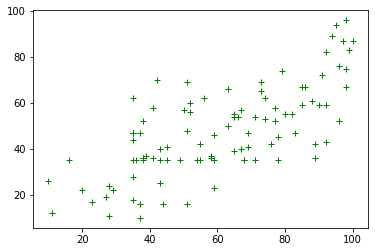

In [98]:
#changing the style of plot
plt.plot(df1.math,df1.sci,'g+')


*Scatter Plot*

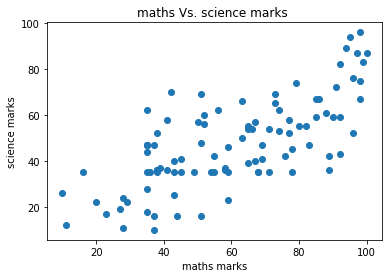

In [99]:
#scatter plot  of maths and science marks
#plt.scatter(df1.math,df1.sci)
plt.scatter('math','sci',data=df1)
plt.title('maths Vs. science marks ')  #Adding title
plt.xlabel('maths marks')              # Adding x-axis label
plt.ylabel('science marks')            # Adding y-axis label
plt.show()

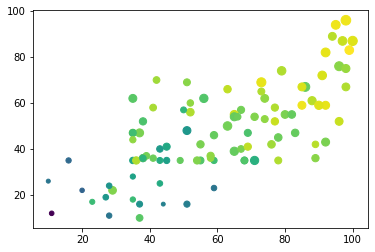

In [ ]:
#plotting more dimensions using color and shape parameters
plt.scatter('math','sci',c='fl',s='sl',data=df1)

*Inferences: Showing 3 clusters - blue - cluster1 where both math and scidence marks are less. Green - cluster2 and Yellow - cluster2*

***Bar plot***

AttributeError: ignored

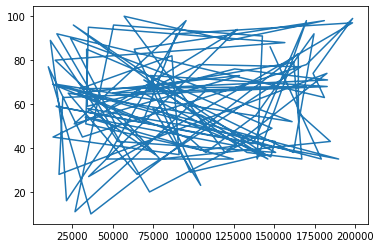

In [130]:
plt.plot(df1.math).bar()

In [105]:
#bar plot - to compare the values among different groups

plt.bar(df1.result.unique(),pf_cnt)
#pf_cnt.plot.bar()

NameError: ignored

In [ ]:
df1.groupby('region')['Pass'].count()

region
A    26
B    21
C    17
D    13
E    13
F    10
Name: Pass, dtype: int64

In [ ]:
reg=df1.region.unique()
reg.sort()
reg


array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

<BarContainer object of 6 artists>

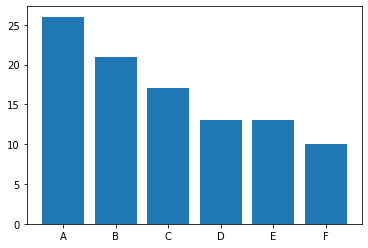

In [ ]:
plt.bar(reg,df1.groupby('region')['Pass'].count())

In [ ]:
r=df1.groupby('region')['Pass'].value_counts()
pdata=r[[0,2,4,6,10]]
fdata=r[[1,3,5,7,9]]

In [ ]:
reg

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

ValueError: ignored

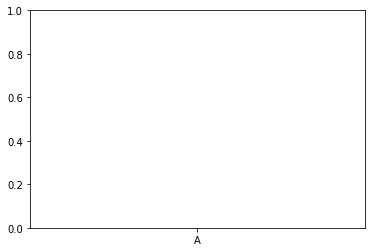

In [ ]:
#stacked bar is not working
plt.bar(reg,pdata,width=0.3,label='pass')
#plt.bar(reg,r[[1,3,5,7,9]]),width=0.3,bottom=r[[0,2,4,6,8,10],label='fail')

(array([ 3.,  3., 12., 18.,  8., 10., 12., 11.,  9., 14.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

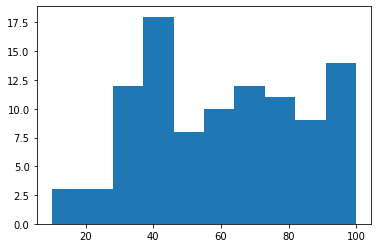

In [ ]:
plt.hist(df1['math'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f65c7182c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f65c718ac50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f65c7191c90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f65c7191750>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f65c718a1d0>,
  <matplotlib.lines.Line2D at 0x7f65c7199b90>]}

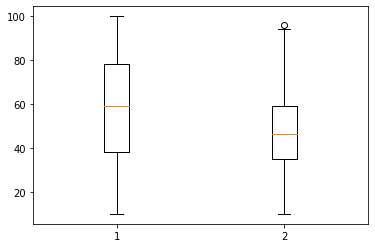

In [ ]:
plt.boxplot([df1.math,df1.sci])

###***Visualization using seaborn***

In [109]:
import seaborn as sns

***count plot - same as that of bar plot*** --
**Visualizing the region-wise count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Region wise count')

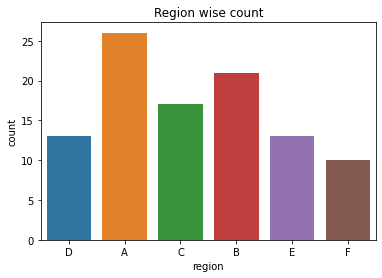

In [118]:
#Visualize the region wise count 
#sns.countplot('region',data=df1)
ax=sns.countplot('region',data=df1)
ax.set_title("Region wise count")

*Inferences: Region A has more entries than regions.*

***Adding one more variable via the parameter "hue"***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Region wise pass/fail count')

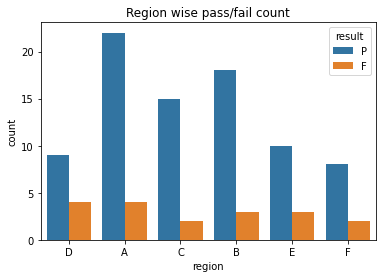

In [119]:
#Visualize the region wise pass and fail count
ax=sns.countplot('region',hue='result',data=df1)
ax.set_title('Region wise pass/fail count')

*Inferences: Region A has more no. of 'pass' that other regions. "fail" *

***Kernel Density Estimation plot***

Text(0.5, 1.0, 'Second Language Mark Distribution')

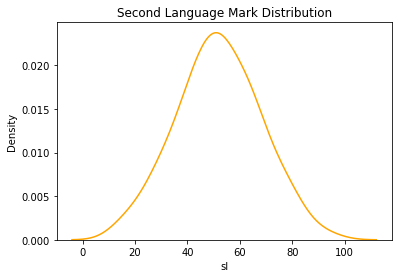

In [121]:
#distribution of second language mark
ax=sns.kdeplot('sl',data=df1,color='orange')
ax.set_title('Second Language Mark Distribution')

*Inferences: Second level language marks Exhibit normal distribution*

***Distribution plot***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Second language mark distribution')

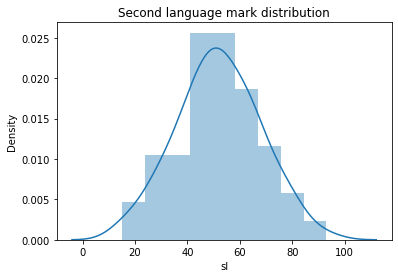

In [123]:
#Distribution plot is similar to kde plot
ax=sns.distplot(df1.sl)
ax.set_title('Second language mark distribution')


*Same curve along with histogram*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Second language mark distribution - Modified bin size')

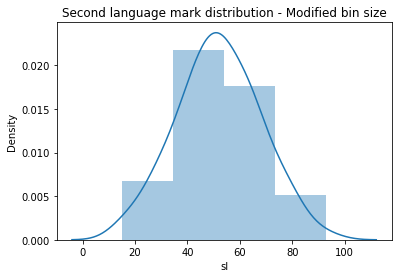

In [124]:
#set the bin size and experiment
ax=sns.distplot(df1.sl,bins=4)
ax.set_title('Second language mark distribution - Modified bin size')

***Scatter plot***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'maths vs.science')

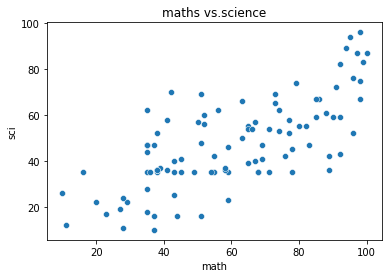

In [125]:
#scatter plot of maths and science marks
ax=sns.scatterplot('math','sci',data=df1)
ax.set_title('maths vs.science')

*Inferences: Maths and Science are linearly related to each other*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of maths and science marks with respect to regions')

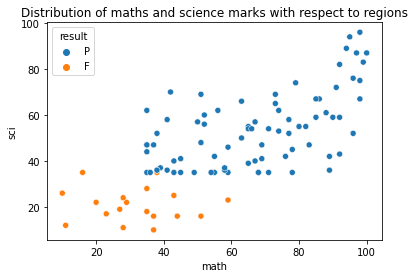

In [126]:
##scatter plot of maths and science marks with respect to regions
ax=sns.scatterplot('math','sci',hue='result',data=df1)
ax.set_title('Distribution of maths and science marks with respect to regions')

*Inferences: Low region along x and y indicates 'Fail' and all above points indicates 'Pass'*

***Pair plot - Shows scatter plot between every pair of variables***

AttributeError: ignored

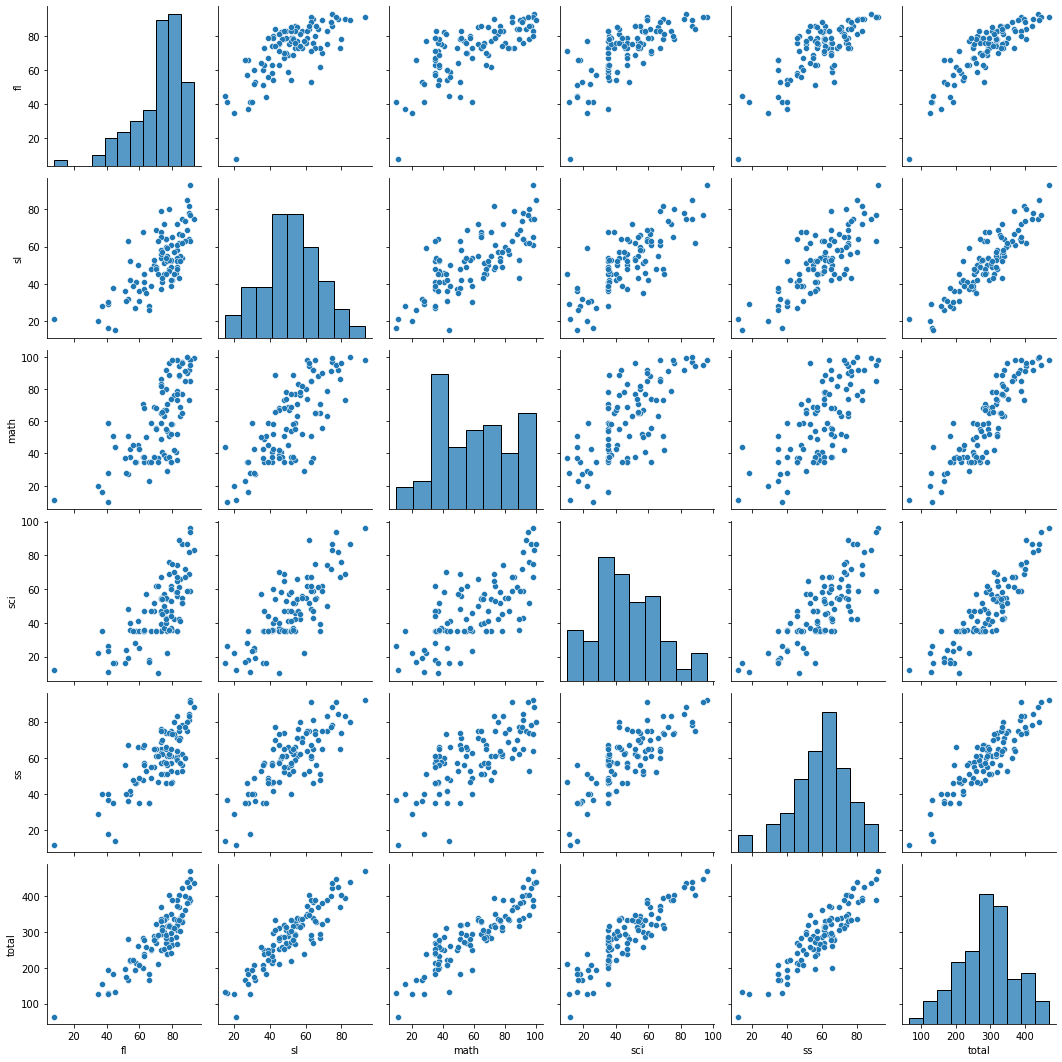

In [127]:
ax=sns.pairplot(df1)
ax.set_label("Pairwise plot")

*Inferences: Most of the marks are exhibiting linear correlations*  

***Heat map - shows the correlation coefficient between a pair of variables***

In [113]:
reg=df1[df1['region']=='D']    #A,D,F

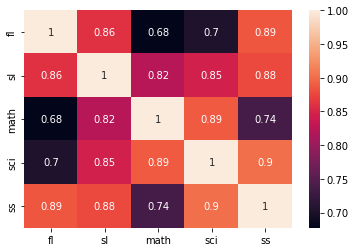

In [128]:
ax=sns.heatmap(reg[['fl','sl','math','sci','ss']].corr('pearson'),annot=True)
ax.set_label("Heat Map")

*Inferences: Maths and science marks exhibit strong positive correlation whereas the strength is little low between maths and first language marks*